In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timezone, timedelta


## Load the data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/commodity 2000-2022.csv')

In [3]:
df_brent = df[df['Symbol'] == 'Brent Oil'].reset_index(drop=True)

## Exploratory data analysis

In [ ]:
df_brent.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388


In [ ]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5718 entries, 0 to 5717
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  5718 non-null   object 
 1   Date    5718 non-null   object 
 2   Open    5718 non-null   float64
 3   High    5718 non-null   float64
 4   Low     5718 non-null   float64
 5   Close   5718 non-null   float64
 6   Volume  5718 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 312.8+ KB


In [ ]:
def generate_data_quality_report(df):
    report_df = pd.DataFrame(columns=['Column', 'Total Values', 'Missing Values', 'Unique Values', 'Data Type'])

    for column in df.columns:
        total_values = len(df)
        missing_values = df[column].isnull().sum()
        unique_values = df[column].nunique()
        data_type = df[column].dtype

        report_df = report_df.append({
            'Column': column,
            'Total Values': total_values,
            'Missing Values': missing_values,
            'Unique Values': unique_values,
            'Data Type': data_type
        }, ignore_index=True)

    return report_df


In [ ]:
data_quality_report = generate_data_quality_report(df_brent[['Symbol', 'Date']])
data_quality_report

<ipython-input-7-35d453eda6ca>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({
<ipython-input-7-35d453eda6ca>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({


,Column,Total Values,Missing Values,Unique Values,Data Type
0,Symbol,5718,0,1,object
1,Date,5718,0,5718,object


In [ ]:
def generate_continuous_data_quality_report(df):
    report_df = pd.DataFrame(columns=[
        'Feature Name', 'Count', '% of Missing Value', 'Cardinality',
        'Min', '1st Qrt', 'Mean', 'Median', '3rd Qrt', 'Max', 'Std. Dev'
    ])

    for column in df.columns:
        data_type = df[column].dtype
        count = df[column].count()
        total_values = len(df)
        missing_percentage = (total_values - count) / total_values * 100 if total_values > 0 else 0
        cardinality = df[column].nunique()

        min_value = df[column].min()
        q1 = df[column].quantile(0.25)
        mean_value = df[column].mean()
        median_value = df[column].median()
        q3 = df[column].quantile(0.75)
        max_value = df[column].max()
        std_dev = df[column].std()


        report_df = report_df.append({
            'Feature Name': column,
            'Data Type': data_type,
            'Count': count,
            '% of Missing Value': missing_percentage,
            'Cardinality': cardinality,
            'Min': min_value,
            '1st Qrt': q1,
            'Mean': mean_value,
            'Median': median_value,
            '3rd Qrt': q3,
            'Max': max_value,
            'Std. Dev': std_dev
        }, ignore_index=True)

    return report_df

In [ ]:
continuous_data_quality_report = generate_continuous_data_quality_report(df_brent[['Open', 'High', 'Low', 'Close', 'Volume']])
continuous_data_quality_report

<ipython-input-9-70e597b0346a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({
<ipython-input-9-70e597b0346a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({
<ipython-input-9-70e597b0346a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({
<ipython-input-9-70e597b0346a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.append({
<ipython-input-9-70e597b0346a>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  report_df = report_df.appe

,Feature Name,Count,% of Missing Value,Cardinality,Min,1st Qrt,Mean,Median,3rd Qrt,Max,Std. Dev,Data Type
0,Open,5718,0.0,3856,17.40,42.4000,64.902574,62.105,82.6500,146.30,29.164001,float64
1,High,5718,0.0,3974,18.05,43.3000,65.797076,62.950,83.7825,147.50,29.429360,float64
2,Low,5718,0.0,3982,15.98,41.5025,63.974976,61.150,81.6300,144.25,28.881333,float64
3,Close,5718,0.0,4159,17.68,42.4500,64.908346,62.080,82.7350,146.08,29.180026,float64
4,Volume,5718,0.0,5663,0.00,46669.7500,148354.833158,126996.000,227555.2500,779723.00,109022.201736,int64


Perform time series analysis. Plot the trend of oil prices (Open, High, Low, Close) over time to see if there is a trend or cyclicality.

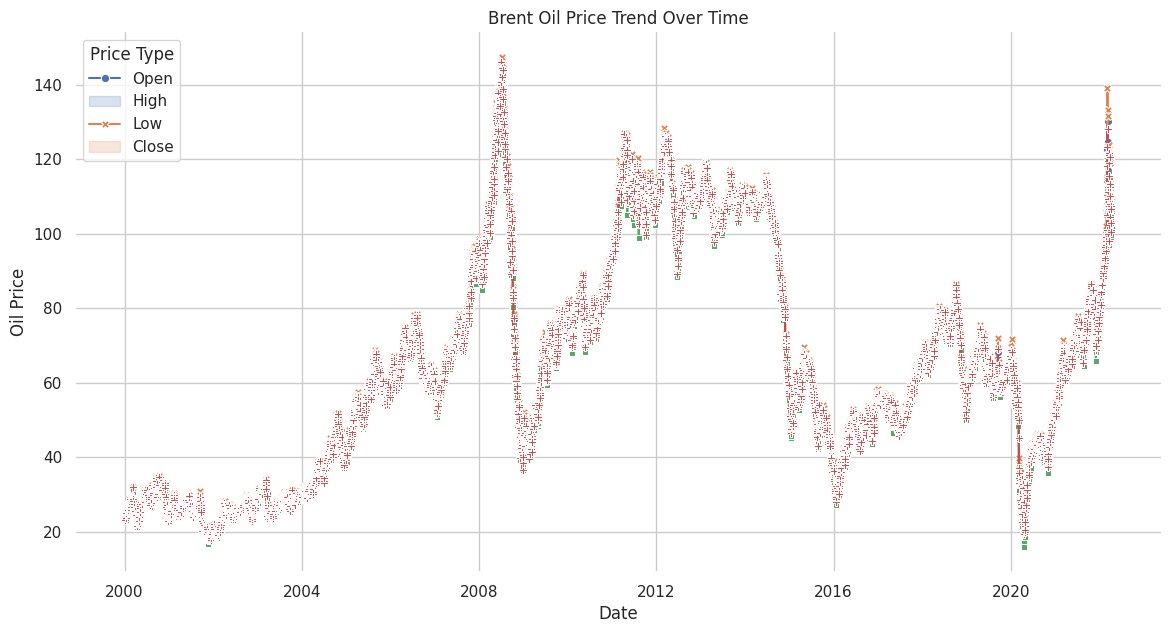

In [ ]:
df_brent_copy = df_brent.copy()

df_brent_copy['Date'] = pd.to_datetime(df_brent_copy['Date'])

df_brent_copy.set_index('Date', inplace=True)
sns.set(style="white")
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_brent_copy[['Open', 'High', 'Low', 'Close']], dashes=False, markers=True)

plt.title('Brent Oil Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.legend(title='Price Type', labels=['Open', 'High', 'Low', 'Close'])
plt.grid(True)
sns.despine(left=True,bottom =True)
plt.show()

From 2000 to 2022, Brent Oil experienced significant volatility. There was an upward trend from the early 2000s to 2009, reaching its peak in that year. However, the market witnessed a rapid decline in 2010. Subsequently, there was another upward movement, with a second minor peak observed from 2011 to 2014, characterized by relatively stable fluctuations. After 2014, oil prices experienced another downturn, hitting a low point in 2016, followed by a period of fluctuating prices. In 2020, there was a new record low, and within the next two years, prices surged rapidly. The overall trend reflects a series of peaks and troughs, demonstrating the inherent volatility in the Brent Oil market over the past two decades.

Plotting the distribution of Open, High, Low, Close: helps to gain insight into the distributional characteristics of these price indicators, providing a visual impression of market behavior and price movements.

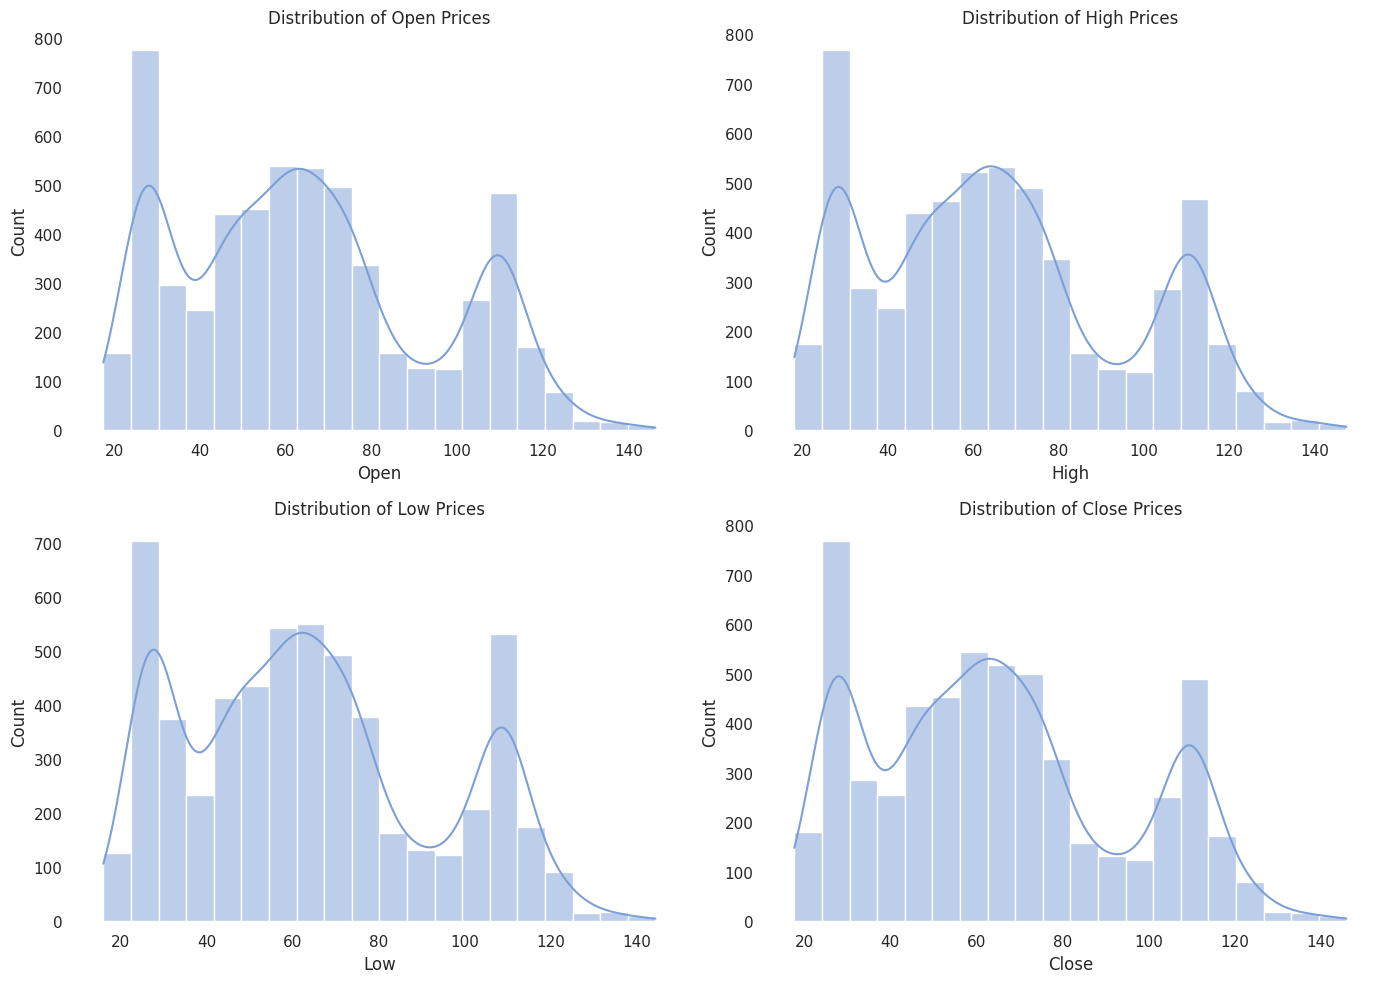

In [ ]:
open_data = df_brent['Open']
high_data = df_brent['High']
low_data = df_brent['Low']
close_data = df_brent['Close']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Open
sns.histplot(open_data, bins=20, color='#7c9fd6', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Open Prices')

# High
sns.histplot(high_data, bins=20, color='#7c9fd6', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of High Prices')

# Low
sns.histplot(low_data, bins=20, color='#7c9fd6', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Low Prices')

# Close
sns.histplot(close_data, bins=20, color='#7c9fd6', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Close Prices')

sns.despine(left=True, bottom=True)

plt.tight_layout()

plt.show()

The visualizations reveal a general similarity in the distributions of Open, High, Low, and Close prices.

Perform volatility analysis: Calculate and visualize daily price volatility using High and Low columns. This helps to understand the volatility of the market.

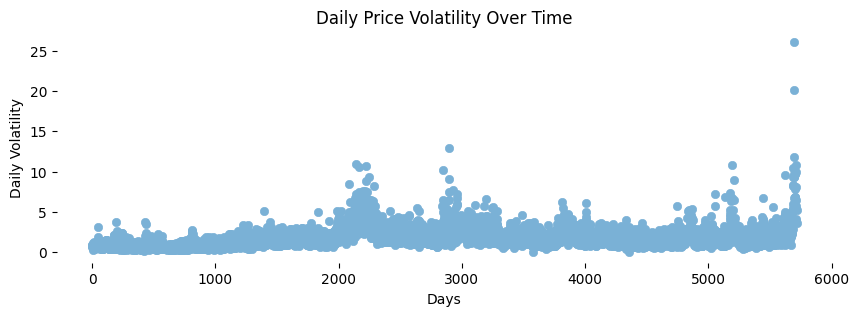

In [4]:
df_brent['Daily_Volatility'] = df_brent['High'] - df_brent['Low']

daily_volatility_df = pd.DataFrame({
    'Days': range(len(df_brent)),
    'Daily_Volatility': df_brent['Daily_Volatility']
})

plt.figure(figsize=(10, 3))
sns.scatterplot(data=daily_volatility_df, x='Days', y='Daily_Volatility', edgecolor=None, color='#7ab1d6')
sns.despine(left=True, bottom=True)
plt.title('Daily Price Volatility Over Time')
plt.xlabel('Days')
plt.ylabel('Daily Volatility')
plt.grid(False)
plt.show()


From the visualizations, it is evident that, apart from a few extreme outliers, the majority of daily price volatilities remain relatively low, typically within the range of 0 to 10.